### Q6 :
Q6: A machine produces items of which 1% at random are defective. How many items can be
packed in a box while keeping the chance of one or more defectives in the box to be no more
than 0.5? What are the expected value and standard deviation of the number of defectives in a
box of that size?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Assuming it to be a bernoulli process. Either an item is defective or not defective 

p = .01

# Assuming that we conduct this for 1000 items, we will get a certain number of items that are defective.
# We repeat the same experiment a 1000 times, and populate an array and check the distribution

n_defects = np.random.binomial(n=1000, p = .01, size = 1000)




In [17]:
#Creating an ecdf function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
        
    return x, y


In [18]:
x,y = ecdf(n_defects)

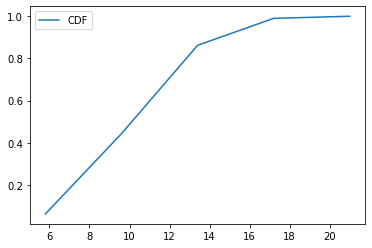

In [21]:
n_defects = n_defects
count, bins_count = np.histogram(n_defects, bins=5)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()

In [25]:
print(cdf)
print(bins_count)

[0.062 0.443 0.862 0.99  1.   ]
[ 2.   5.8  9.6 13.4 17.2 21. ]


In [6]:
#Calculating cumulative probabilty
#If we calculate the total number of items corresponding to the cumulative probability less than 0.5, we will be able to 
# figure out the answer

cumsum = 0 #Placeholder for cumululative probability 
cumsum_list = []
for i in range (0,len(y)):
    cumsum += y[i]
    cumsum_list.append(cumsum)

print(cumsum_list[:4])

tuple_list = list(zip(cumsum_list,x))


[0.001, 0.003, 0.006, 0.01]


In [7]:
print(tuple_list[:4])

[(0.001, 2), (0.003, 2), (0.006, 3), (0.01, 3)]


In [8]:
for i in tuple_list:
    if i[0] >= 0.5:
        a = i[1]
        #print(i[1])
        break
print('The max number of boxes that can be fit are {a}'.format(a = a))

The max number of boxes that can be fit are 5


### However the cdf plot suggests otherwise, would request feedback